<a href="https://colab.research.google.com/github/Shezan57/LLM/blob/main/Clusturing_and_topic_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.8 MB/s eta 0:00:00


In [7]:
from datasets import load_dataset

In [8]:
dataset = load_dataset("maartengr/arxiv_nlp")["train"]

README.md:   0%|          | 0.00/617 [00:00<?, ?B/s]

data.csv:   0%|          | 0.00/53.2M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [9]:
abstracts = dataset["Abstracts"]
titles = dataset["Titles"]

In [10]:
abstracts

['  In this paper Arabic was investigated from the speech recognition problem\npoint of view. We propose a novel approach to build an Arabic Automated Speech\nRecognition System (ASR). This system is based on the open source CMU Sphinx-4,\nfrom the Carnegie Mellon University. CMU Sphinx is a large-vocabulary;\nspeaker-independent, continuous speech recognition system based on discrete\nHidden Markov Models (HMMs). We build a model using utilities from the\nOpenSource CMU Sphinx. We will demonstrate the possible adaptability of this\nsystem to Arabic voice recognition.\n',
 '  In this paper we present the creation of an Arabic version of Automated\nSpeech Recognition System (ASR). This system is based on the open source\nSphinx-4, from the Carnegie Mellon University. Which is a speech recognition\nsystem based on discrete hidden Markov models (HMMs). We investigate the\nchanges that must be made to the model to adapt Arabic voice recognition.\n  Keywords: Speech recognition, Acoustic mo

In [11]:
titles

['Introduction to Arabic Speech Recognition Using CMUSphinx System',
 'Arabic Speech Recognition System using CMU-Sphinx4',
 'On the Development of Text Input Method - Lessons Learned',
 'Network statistics on early English Syntax: Structural criteria',
 'Segmentation and Context of Literary and Musical Sequences',
 'International Standard for a Linguistic Annotation Framework',
 'A Formal Model of Dictionary Structure and Content',
 'Practical Approach to Knowledge-based Question Answering with Natural\n  Language Understanding and Advanced Reasoning',
 'Learning Probabilistic Models of Word Sense Disambiguation',
 'Learning Phonotactics Using ILP',
 'Bootstrapping Deep Lexical Resources: Resources for Courses',
 'Bio-linguistic transition and Baldwin effect in an evolutionary\n  naming-game model',
 "Zipf's Law and Avoidance of Excessive Synonymy",
 'On the role of autocorrelations in texts',
 'On the fractal nature of mutual relevance sequences in the Internet news\n  message flows'

In [12]:
from sentence_transformers import SentenceTransformer

In [13]:
embedding_model = SentenceTransformer("thenlper/gte-small")
embeddings = embedding_model.encode(abstracts,show_progress_bar=True)

modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/68.1k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/583 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/66.7M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1405 [00:00<?, ?it/s]

In [14]:
embeddings.shape

(44949, 384)

In [15]:
!pip install umap-learn

In [16]:
from umap import UMAP

In [17]:
umap_model = UMAP(n_components=5, min_dist=0.0, metric='cosine', random_state=42)
reduced_embeddings = umap_model.fit_transform(embeddings)

In [18]:
!pip install hdbscan

In [19]:
from hdbscan import HDBSCAN

In [20]:
hdbscan_model = HDBSCAN(
    min_cluster_size=50,
    metric='euclidean',
    cluster_selection_method='eom'
).fit(reduced_embeddings)

In [21]:
clusters = hdbscan_model.labels_

In [22]:
len(set(clusters))

153

In [23]:
import numpy as np

In [24]:
cluster = 0
for index in np.where(clusters==cluster)[0][:3]:
  print(abstracts[index][:300]+"...\n")

  This works aims to design a statistical machine translation from English text
to American Sign Language (ASL). The system is based on Moses tool with some
modifications and the results are synthesized through a 3D avatar for
interpretation. First, we translate the input text to gloss, a written fo...

  Researches on signed languages still strongly dissociate lin- guistic issues
related on phonological and phonetic aspects, and gesture studies for
recognition and synthesis purposes. This paper focuses on the imbrication of
motion and meaning for the analysis, synthesis and evaluation of sign lang...

  Modern computational linguistic software cannot produce important aspects of
sign language translation. Using some researches we deduce that the majority of
automatic sign language translation systems ignore many aspects when they
generate animation; therefore the interpretation lost the truth inf...



In [25]:
import pandas as pd


In [26]:
reduced_embeddings = UMAP(n_components=2,
                          min_dist=0.0,
                          metric='cosine',
                          random_state=42).fit_transform(embeddings)

In [27]:
df = pd.DataFrame(reduced_embeddings, columns=['x', 'y'])
df['title'] = titles
df["cluster"] = [str(c) for c in clusters]

In [28]:
clusters_df = df.loc[df.cluster != "-1", :]
outliers_df = df.loc[df.cluster == "-1", :]

In [29]:
import matplotlib.pyplot as plt

(-7.778345727920533,
 10.878833436965943,
 -1.711702972650528,
 16.388065367937088)

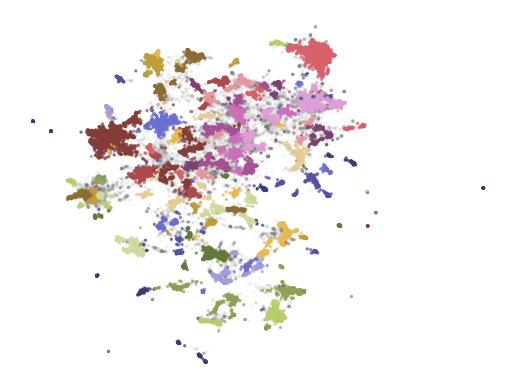

In [30]:
plt.scatter(outliers_df.x, outliers_df.y, alpha=0.05, s=2, c='grey')
plt.scatter(clusters_df.x, clusters_df.y, alpha=0.6, s=2,
            c=clusters_df.cluster.astype(int),
            cmap='tab20b')
plt.axis('off')

In [31]:
!pip install bertopic

In [32]:
from bertopic import BERTopic # Import BERTopic

In [34]:
topic_model = BERTopic(
    embedding_model=embedding_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    verbose=True
).fit(abstracts, embeddings)

2025-02-23 07:28:34,935 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-02-23 07:30:30,170 - BERTopic - Dimensionality - Completed ✓
2025-02-23 07:30:30,173 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-02-23 07:30:36,205 - BERTopic - Cluster - Completed ✓
2025-02-23 07:30:36,248 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-02-23 07:30:43,979 - BERTopic - Representation - Completed ✓


In [35]:
topic_model.get_topic_info()

Topic  Count                                           Name  \
0       -1  14462                               -1_the_of_and_to   
1        0   2241                 0_question_questions_qa_answer   
2        1   2098                   1_speech_asr_recognition_end   
3        2    903               2_image_visual_multimodal_images   
4        3    887  3_summarization_summaries_summary_abstractive   
..     ...    ...                                            ...   
148    147     54           147_counseling_mental_therapy_health   
149    148     53                     148_chatgpt_its_openai_has   
150    149     52                149_mixed_code_sentiment_mixing   
151    150     51   150_diffusion_generation_autoregressive_text   
152    151     51         151_coherence_discourse_paragraph_text   

                                        Representation  \
0    [the, of, and, to, in, we, for, that, language...   
1    [question, questions, qa, answer, answering, a...   
2    [speech, asr, recognition, end, acoustic, audi...   
3    [image, visual, multimodal, images, vision, mo...   
4    [summarization, summaries, summary, abstractiv...   
..                                                 ...   
148  [counseling, mental, therapy, health, psychoth...   
149  [chatgpt, its, openai, has, it, tasks, capabil...   
150  [mixed, code, sentiment, mixing, english, anal...   
151  [diffusion, generation, autoregressive, text, ...   
152  [coherence, discourse, paragraph, text, cohesi...   

                                   Representative_Docs  
0    [  Cross-lingual text classification aims at t...  
1    [  Question generation (QG) attempts to solve ...  
2    [  End-to-end models have achieved impressive ...  
3    [  In this paper we propose a model to learn m...  
4    [  We present a novel divide-and-conquer metho...  
..                                                 ...  
148  [  Mental health care poses an increasingly se...  
149  [  Over the last few years, large language mod...  
150  [  In today's interconnected and multilingual ...  
151  [  Diffusion models have achieved great succes...  
152  [  While there has been significant progress t...  

[153 rows x 5 columns]

In [36]:
topic_model.get_topic(0)

[('question', 0.021262463291547223),
 ('questions', 0.015866039067984204),
 ('qa', 0.015830640927795868),
 ('answer', 0.015787698152510205),
 ('answering', 0.014859992848422435),
 ('answers', 0.00992918704536005),
 ('retrieval', 0.009497931820914705),
 ('comprehension', 0.007719047154229789),
 ('reading', 0.007175282051339653),
 ('knowledge', 0.0063049421989358)]

In [37]:
topic_model.find_topics("topic modeling")

([22, -1, 50, 38, 84],
 [0.95448655, 0.91218555, 0.9067658, 0.9051957, 0.9026561])

In [38]:
topic_model.get_topic(22)

[('topic', 0.06782148231481569),
 ('topics', 0.03509097163093816),
 ('lda', 0.0162350543969945),
 ('latent', 0.013482620892138605),
 ('document', 0.01258276852968132),
 ('documents', 0.012463820004375148),
 ('modeling', 0.011571581804609226),
 ('dirichlet', 0.009901318233964887),
 ('word', 0.00852094200971816),
 ('allocation', 0.007792539607690728)]

In [39]:
topic_model.topics_[titles.index("BERTopic: Neural topic modeling with a class-based TF-IDF procedure")]

22

In [40]:
fig = topic_model.visualize_documents(
    titles,
    reduced_embeddings=reduced_embeddings,
    width=1200,
    hide_annotations=True,
)

In [41]:
fig.update_layout(font=dict(size=16))

In [42]:
topic_model.visualize_heatmap(n_clusters=30)

In [43]:
topic_model.visualize_hierarchy()

In [45]:
#save original representation
from copy import deepcopy
original_topics = deepcopy(topic_model.topic_representations_)

In [50]:
def topic_differences(model, original_topics, nr_topics=5):
  """show the differences in topic representations between two models"""
  df = pd.DataFrame(columns=['Topic', 'Original', 'Updated'])
  for topic in range(nr_topics):
    # Extract top 5 word per topic per model
    og_words = " | ".join(list(zip(*original_topics[topic]))[0][:5])
    # Call get_topic method with parentheses instead of square brackets
    new_words = " | ".join(list(zip(*model.get_topic(topic)))[0][:5])
    df.loc[len(df)] = [topic, og_words, new_words]
  return df

In [47]:
from bertopic.representation import KeyBERTInspired

In [48]:
#update our topic representations using KeyBERTInspired
representation_model = KeyBERTInspired()
topic_model.update_topics(abstracts, representation_model=representation_model)

In [51]:
#show topic differences
topic_differences(topic_model,original_topics)

Topic                                           Original  \
0      0     question | questions | qa | answer | answering   
1      1        speech | asr | recognition | end | acoustic   
2      2      image | visual | multimodal | images | vision   
3      3  summarization | summaries | summary | abstract...   
4      4        translation | nmt | machine | neural | bleu   

                                             Updated  
0  answering | questions | answer | question | co...  
1  phonetic | encoder | language | speech | trans...  
2  captioning | multimodal | visual | visually | ...  
3  summarization | summarizers | summaries | summ...  
4  translation | translate | translated | transla...

In [52]:
from bertopic.representation import MaximalMarginalRelevance

In [54]:
#update our topic representations to MaximalMarginalRelevence
repsentation_model = MaximalMarginalRelevance(diversity=0.2)
topic_model.update_topics(abstracts, representation_model=representation_model)

In [56]:
topic_differences(topic_model, original_topics)

Topic                                           Original  \
0      0     question | questions | qa | answer | answering   
1      1        speech | asr | recognition | end | acoustic   
2      2      image | visual | multimodal | images | vision   
3      3  summarization | summaries | summary | abstract...   
4      4        translation | nmt | machine | neural | bleu   

                                             Updated  
0  answering | questions | answer | question | co...  
1  phonetic | encoder | language | speech | trans...  
2  captioning | multimodal | visual | visually | ...  
3  summarization | summarizers | summaries | summ...  
4  translation | translate | translated | transla...

In [57]:
from transformers import pipeline
from bertopic.representation import TextGeneration

In [58]:
prompt = """I have a topic that contains the following documents:
[DOCUMENTS]
The topic is described by the following keywords: '[KEYWORDS]'.
Based on the documents and keywords, what is this topic about?"""
# Update our topic representations using Flan-T5
generator = pipeline("text2text-generation", model="google/flan-t5-small")
representation_model = TextGeneration(generator, prompt=prompt, doc_length=50, tokenizer="whitespace")
topic_model.update_topics(abstracts, representation_model=representation_model)

config.json:   0%|          | 0.00/1.40k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/308M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

Device set to use cuda:0
100%|██████████| 153/153 [00:19<00:00,  7.82it/s]


In [59]:
# Show topic differences
topic_differences(topic_model, original_topics)

Topic                                           Original  \
0      0     question | questions | qa | answer | answering   
1      1        speech | asr | recognition | end | acoustic   
2      2      image | visual | multimodal | images | vision   
3      3  summarization | summaries | summary | abstract...   
4      4        translation | nmt | machine | neural | bleu   

                                  Updated  
0  Question answering systems |  |  |  |   
1          Speech recognition |  |  |  |   
2     Image-language learning |  |  |  |   
3               Summarization |  |  |  |   
4                Science/Tech |  |  |  |

In [ ]:
import openai
from bertopic.representation import OpenAI
prompt = """
I have a topic that contains the following documents:
[DOCUMENTS]
The topic is described by the following keywords: [KEYWORDS]
Based on the information above, extract a short topic label in the following
format:
topic: <short topic label>
"""
# Update our topic representations using GPT-3.5
client = openai.OpenAI(api_key="YOUR_KEY_HERE")
representation_model = OpenAI(
client, model="gpt-3.5-turbo", exponential_backoff=True, chat=True,
prompt=prompt
)
topic_model.update_topics(abstracts, representation_model=representation_model)
# Show topic differences
topic_differences(topic_model, original_topics)

In [ ]:
# Visualize topics and documents
fig = topic_model.visualize_document_datamap(
titles,
topics=list(range(20)),
reduced_embeddings=reduced_embeddings,
width=1200,
label_font_size=11,
label_wrap_width=20,
use_medoids=True,
)